# <font color='red'>-- Telecom. Company Customer Churn --</font>
#### Author: Fábio Marane

---
The following project uses Scikit-Learn's K-Nearest Neighbors and Bernoulli Naïve-Bayes models to predict the customer churn of a telecommunications company. The data source is Kaggle, and the link is given below. 

Source: https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets?select=churn-bigml-20.csv

- Importing the data and first sight:

In [1]:
import pandas as pd

data = pd.read_csv('churn_dataset.csv')

print(data.shape)
data.head() 

(2666, 20)


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


- Seaborn plot for class proportion view:

<Axes: xlabel='Churn', ylabel='count'>

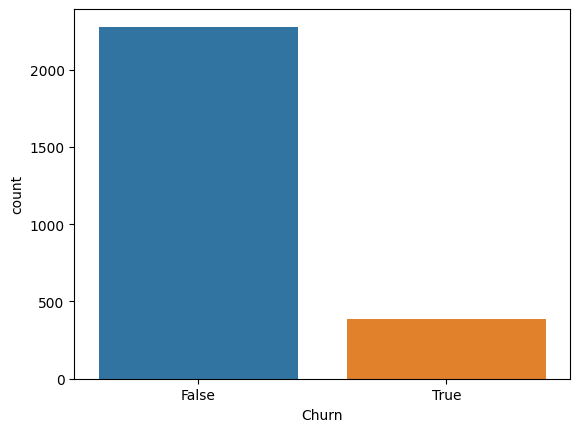

In [2]:
import seaborn as sns

sns.countplot(x = data['Churn'])

- Class proportion calculation:

In [3]:
T = data[data['Churn'] == True]['Churn'].count()
F = data[data['Churn'] == False]['Churn'].count()
proportion = F/T

print(f"There are {proportion} false's to each true")

There are 5.871134020618556 false's to each true


- As the data is heavily unbalanced, it is necessary to include virtual data. The tool used will be SKLearn's SMOTE function. However, as this functions only accepts numerical value, i will perform a mapping for the cathegorical values using SKLearn's LabelEncoder:

In [4]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
d_copy = data.copy()
str_columns = data.select_dtypes(include = object).columns
for i in str_columns:
    data[i] = LE.fit_transform(data[i].astype(str))

- A copy of the dataframe is created for the construction of a new dataframe containing the states and their respective numbers. This is done for future querries:

In [5]:
state_dict = {
    'state': d_copy['State'].drop_duplicates(),
    'state_num': data['State'].drop_duplicates()
}
state_df = pd.DataFrame(state_dict)

state_df = state_df.sort_values('state')

state_df.head(5)

,state,state_num
32,AK,0
5,AL,1
36,AR,2
19,AZ,3
51,CA,4


- With the numerical dataframe, it is possible to apply SMOTE. After applying, a plot is done to concretize the balancing. A seed is determined for the rest of the project:

<Axes: xlabel='Churn', ylabel='count'>

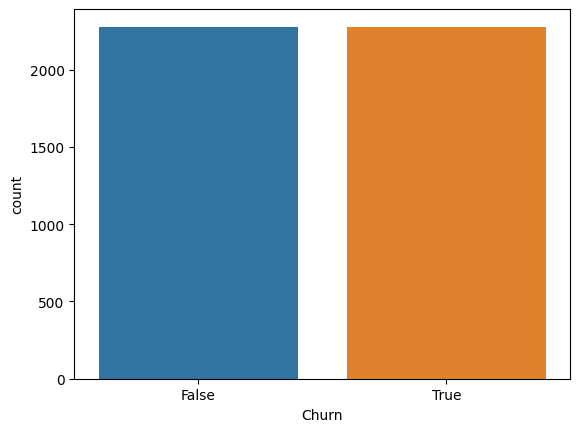

In [6]:
import numpy as np
from imblearn.over_sampling import SMOTE

np.random.seed(20)

raw_x1 = data.drop('Churn', axis = 1)
raw_x2 = data['Churn']

sm = SMOTE()
raw_x1, raw_x2 = sm.fit_resample(raw_x1, raw_x2)
data = pd.concat([raw_x1, raw_x2], axis = 1)

sns.countplot(x = data['Churn'])

- After balancing, it is done a scaling to avoid model bias:

In [7]:
from sklearn.preprocessing import StandardScaler

raw_x1 = data.drop('Churn', axis = 1)
x2 = data['Churn']

scaler = StandardScaler()
x1 = scaler.fit_transform(raw_x1)

- The data is then separated between train and test, at the proportion of 3 to 1 (25%):

In [8]:
from sklearn.model_selection import train_test_split

x1_train, x1_test, x2_train, x2_test = train_test_split(x1, x2, test_size = 0.25)

- Before applying the models, a dummy classifier will be performed to determine a prediction base. This classifier retrieves the most common class value and uses it for its predictions. The classifier is instantiated and its accuracy is obtained:

In [9]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()
dummy.fit(x1_train, x2_train)
accuracy_dummy = dummy.score(x1_test, x2_test)*100

print(f'The training was done with {len(x1_train)}, and the test with {len(x1_test)}.\nThe accuracy of the dummy classifer was {accuracy_dummy:.2f}%.')

The training was done with 3417, and the test with 1139.
The accuracy of the dummy classifer was 49.25%.


- The K-Nearest Neighbors model is instantiated and applied both Euclidean and Chebyshev metrics:

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn_euclidean = KNeighborsClassifier(metric = 'euclidean')
knn_chebyshev = KNeighborsClassifier(metric = 'chebyshev')
                                     
knn_euclidean.fit(x1_train, x2_train)
knn_chebyshev.fit(x1_train, x2_train)

KNeighborsClassifier(metric='chebyshev')

- The model performs a prediction on test data and the accuracy is retrieved for both metrics:

In [11]:
from sklearn.metrics import accuracy_score

prediction_euclidean = knn_euclidean.predict(x1_test)
accuracy_euclidean = accuracy_score(x2_test, prediction_euclidean)*100

prediction_chebyshev = knn_chebyshev.predict(x1_test)
accuracy_chebyshev = accuracy_score(x2_test, prediction_chebyshev)*100

print(f'The training was done with {len(x1_train)}, and the test with {len(x1_test)}.\nThe accuracy for the Euclidean metric was {accuracy_euclidean:.2f}%, and for the Chebyshev metric was{accuracy_chebyshev:.2f}%.')


The training was done with 3417, and the test with 1139.
The accuracy for the Euclidean metric was 86.83%, and for the Chebyshev metric was82.53%.


- Another training will be done with SKLearn's Bernoulli Naïve-Bayes model. This model is applied on Bernoulli Distributions, which only contains binary data. As the dataset contains many numerical values, a binarization will be performed by the mean value of the features:

In [12]:
from sklearn.naive_bayes import BernoulliNB

mean = np.mean(x1_train)
bnb = BernoulliNB(binarize = mean)
bnb.fit(x1_train, x2_train)

BernoulliNB(binarize=0.0012682880797923472)

- The accuracy for BNB is retrieved:

In [13]:
prediction_bnb = bnb.predict(x1_test)
accuracy_bnb = accuracy_score(x2_test, prediction_bnb)*100
print(f'The training was done with {len(x1_train)}, and the test with {len(x1_test)}.\nThe accuracy of the BNB model was {accuracy_bnb:.2f}%.')

The training was done with 3417, and the test with 1139.
The accuracy of the BNB model was 63.48%.


- Finally, a Decision Tree Classifier is applied, also from SKLearn. The depth (number of branches) is set to 50:

In [14]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth = 50)
dtc.fit(x1_train, x2_train)

DecisionTreeClassifier(max_depth=50)

- The accuracy of DTC is obtained:

In [15]:
prediction_dtc = dtc.predict(x1_test)
accuracy_dtc = accuracy_score(x2_test, prediction_bnb)*100
print(f'The training was done with {len(x1_train)}, and the test with {len(x1_test)}.\nThe accuracy of the DTC model was {accuracy_dtc:.2f}%.')

The training was done with 3417, and the test with 1139.
The accuracy of the DTC model was 63.48%.


- For the sake of comparison, a dataframe of the models and their respective accuracies is constructed:

In [16]:
models_map = [{
    'Dummy': accuracy_dummy,
    'Euclidean KNN': accuracy_euclidean,
    'Chebyshev KNN': accuracy_chebyshev,
    'Decision Tree Classifier': accuracy_dtc
}]
models_df = pd.DataFrame(models_map)

print('Percentage of accuracy of each applied model:')
models_df

Percentage of accuracy of each applied model:


,Dummy,Euclidean KNN,Chebyshev KNN,Decision Tree Classifier
0,49.253731,86.830553,82.528534,63.476734
